In [3]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


In [4]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


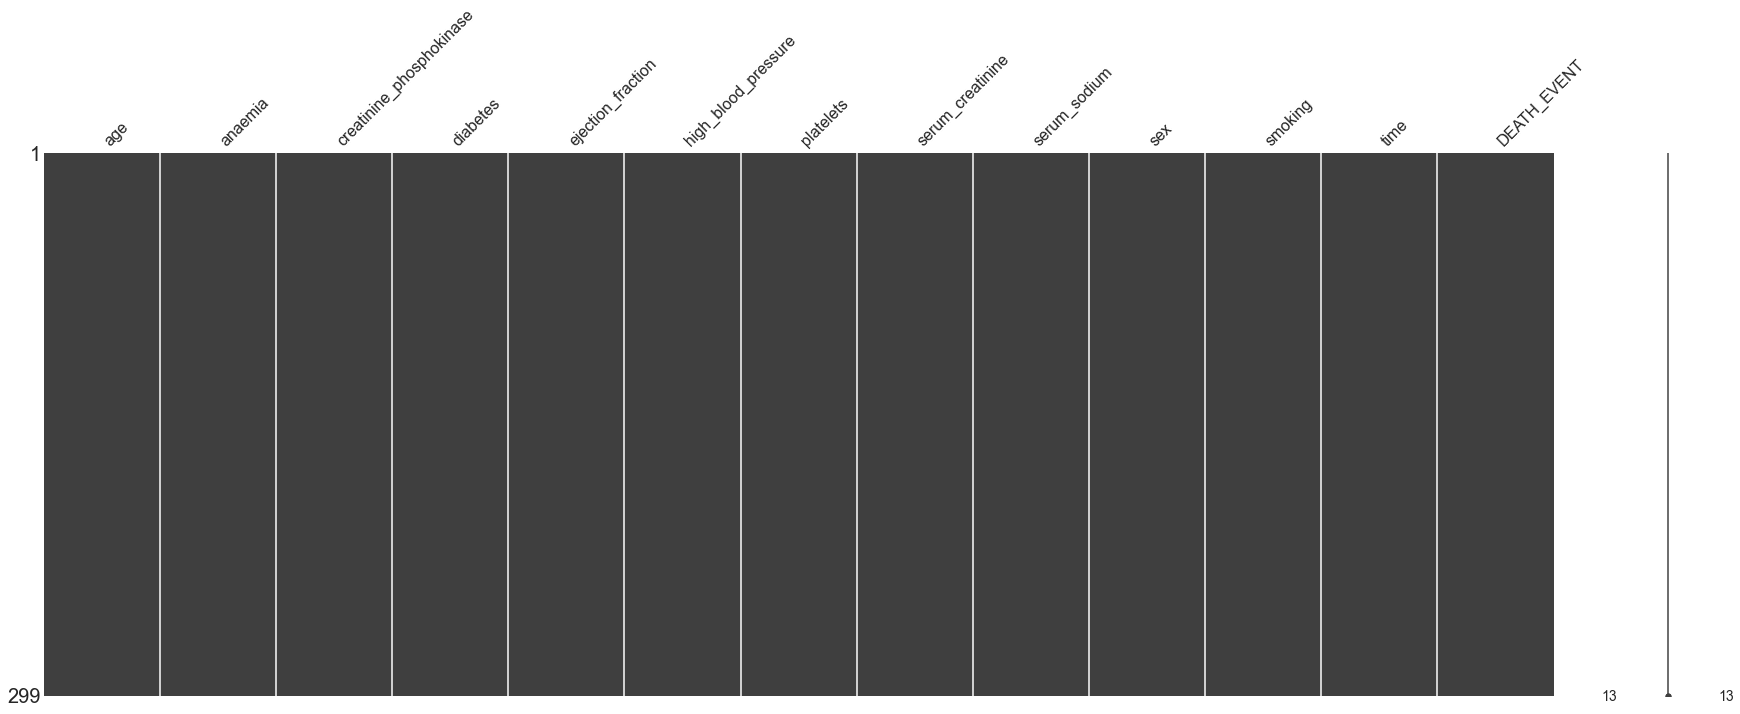

In [6]:
# Plot graphic of missing values
# White gaps indicate missing values
missingno.matrix(data, figsize = (30,10))

In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# Different data types in the dataset
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
# check for duplicates
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


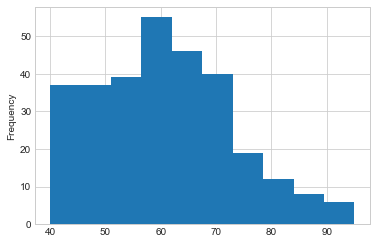

In [10]:
# View age distribution
data.age.plot.hist()

In [11]:
# Overview of data
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


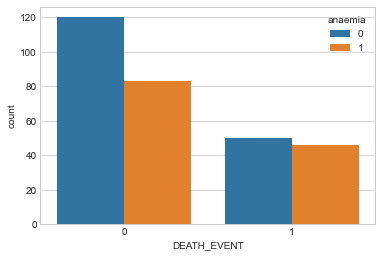

In [12]:
# How many individuals with anaemia died?
sns.countplot(x=data['DEATH_EVENT'],hue='anaemia',data=data)

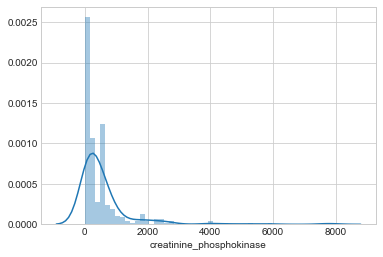

In [13]:
# Distribution of Creatinine Phosphokinase
sns.distplot(data.creatinine_phosphokinase)

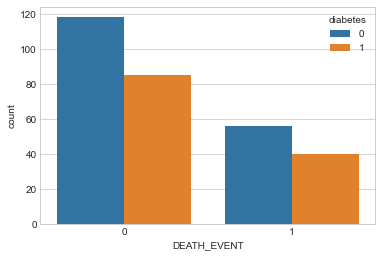

In [14]:
# Comparing other factors with death rate
sns.countplot(x=data['DEATH_EVENT'],hue='diabetes',data=data)

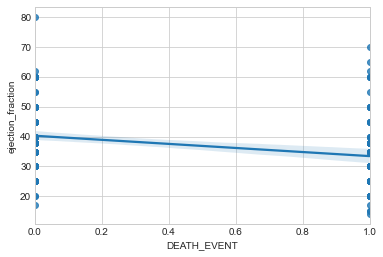

In [15]:
sns.regplot(x=data['DEATH_EVENT'], y=data['ejection_fraction'])

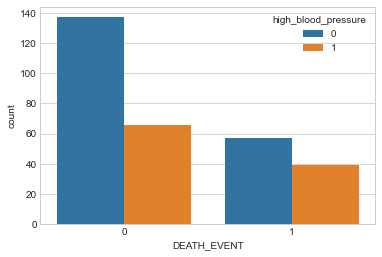

In [16]:
sns.countplot(x=data['DEATH_EVENT'],hue='high_blood_pressure',data=data)

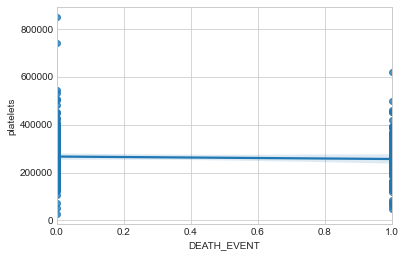

In [17]:
sns.regplot(x=data['DEATH_EVENT'], y=data['platelets'])

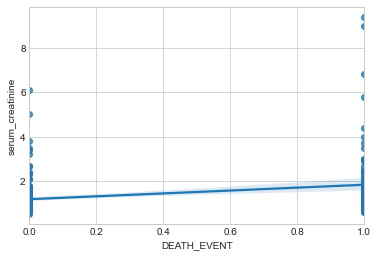

In [18]:
sns.regplot(x=data['DEATH_EVENT'], y=data['serum_creatinine'])

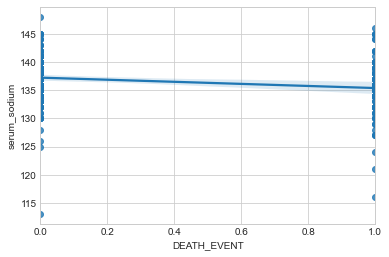

In [19]:
sns.regplot(x=data['DEATH_EVENT'], y=data['serum_sodium'])

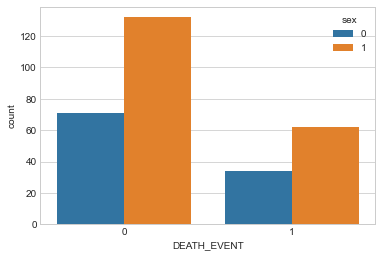

In [20]:
sns.countplot(x=data['DEATH_EVENT'],hue='sex',data=data)

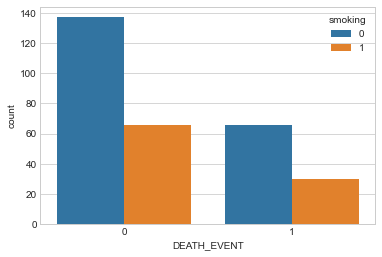

In [21]:
sns.countplot(x=data['DEATH_EVENT'],hue='smoking',data=data)

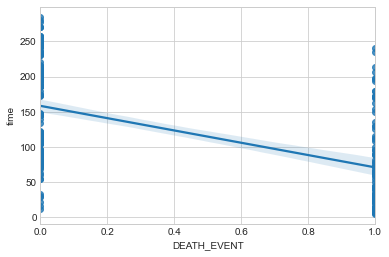

In [22]:
sns.regplot(x=data['DEATH_EVENT'], y=data['time'])

In [23]:
# Split data into test and train
y=data['DEATH_EVENT']
x=data.drop(['DEATH_EVENT'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [27]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, x_train, y_train, cv):
    
    # One Pass
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [28]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 85.77
Accuracy CV 10-Fold: 84.1
Running Time: 0:00:03.618559


In [30]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 76.57
Accuracy CV 10-Fold: 65.27
Running Time: 0:00:00.226488


In [31]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 82.85
Accuracy CV 10-Fold: 80.75
Running Time: 0:00:00.168723


In [32]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 69.46
Accuracy CV 10-Fold: 53.56
Running Time: 0:00:00.215016


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [33]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 30.54
Accuracy CV 10-Fold: 61.92
Running Time: 0:00:00.172664


In [34]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 78.24
Running Time: 0:00:00.180727


In [35]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 82.43
Running Time: 0:00:00.731678


In [37]:
# Define the categorical features for the CatBoost model
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11])

In [39]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(x_train, 
                  y_train,
                  cat_features)

In [40]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.005591
0:	learn: 0.6914504	total: 65.9ms	remaining: 1m 5s
1:	learn: 0.6893274	total: 82.3ms	remaining: 41.1s
2:	learn: 0.6871991	total: 88.5ms	remaining: 29.4s
3:	learn: 0.6844354	total: 94.8ms	remaining: 23.6s
4:	learn: 0.6813154	total: 101ms	remaining: 20.1s
5:	learn: 0.6785785	total: 106ms	remaining: 17.5s
6:	learn: 0.6755394	total: 109ms	remaining: 15.5s
7:	learn: 0.6721387	total: 114ms	remaining: 14.1s
8:	learn: 0.6699620	total: 116ms	remaining: 12.8s
9:	learn: 0.6660856	total: 122ms	remaining: 12s
10:	learn: 0.6648180	total: 124ms	remaining: 11.2s
11:	learn: 0.6618619	total: 129ms	remaining: 10.7s
12:	learn: 0.6575665	total: 135ms	remaining: 10.3s
13:	learn: 0.6547179	total: 141ms	remaining: 9.94s
14:	learn: 0.6518758	total: 147ms	remaining: 9.67s
15:	learn: 0.6486257	total: 153ms	remaining: 9.42s
16:	learn: 0.6463793	total: 160ms	remaining: 9.24s
17:	learn: 0.6442062	total: 166ms	remaining: 9.05s
18:	learn: 0.6412466	total: 170ms	remaining: 8.78s
19:	learn

176:	learn: 0.4194861	total: 1.59s	remaining: 7.42s
177:	learn: 0.4188040	total: 1.69s	remaining: 7.82s
178:	learn: 0.4176488	total: 1.71s	remaining: 7.83s
179:	learn: 0.4166217	total: 1.73s	remaining: 7.88s
180:	learn: 0.4159617	total: 1.74s	remaining: 7.86s
181:	learn: 0.4152921	total: 1.74s	remaining: 7.83s
182:	learn: 0.4148541	total: 1.75s	remaining: 7.83s
183:	learn: 0.4141264	total: 1.76s	remaining: 7.81s
184:	learn: 0.4135051	total: 1.77s	remaining: 7.8s
185:	learn: 0.4127259	total: 1.78s	remaining: 7.81s
186:	learn: 0.4120871	total: 1.79s	remaining: 7.79s
187:	learn: 0.4107779	total: 1.82s	remaining: 7.85s
188:	learn: 0.4095602	total: 1.82s	remaining: 7.82s
189:	learn: 0.4087464	total: 1.83s	remaining: 7.79s
190:	learn: 0.4081159	total: 1.83s	remaining: 7.76s
191:	learn: 0.4074451	total: 1.84s	remaining: 7.74s
192:	learn: 0.4067717	total: 1.84s	remaining: 7.71s
193:	learn: 0.4061377	total: 1.86s	remaining: 7.72s
194:	learn: 0.4055144	total: 1.87s	remaining: 7.71s
195:	learn: 0

352:	learn: 0.3212604	total: 3.14s	remaining: 5.75s
353:	learn: 0.3206265	total: 3.14s	remaining: 5.74s
354:	learn: 0.3201704	total: 3.15s	remaining: 5.72s
355:	learn: 0.3194958	total: 3.16s	remaining: 5.71s
356:	learn: 0.3191902	total: 3.16s	remaining: 5.69s
357:	learn: 0.3189014	total: 3.16s	remaining: 5.67s
358:	learn: 0.3184230	total: 3.17s	remaining: 5.66s
359:	learn: 0.3183598	total: 3.17s	remaining: 5.64s
360:	learn: 0.3179424	total: 3.17s	remaining: 5.62s
361:	learn: 0.3174207	total: 3.18s	remaining: 5.6s
362:	learn: 0.3168596	total: 3.18s	remaining: 5.59s
363:	learn: 0.3165222	total: 3.19s	remaining: 5.57s
364:	learn: 0.3162815	total: 3.19s	remaining: 5.55s
365:	learn: 0.3161746	total: 3.19s	remaining: 5.53s
366:	learn: 0.3154170	total: 3.2s	remaining: 5.51s
367:	learn: 0.3151177	total: 3.2s	remaining: 5.5s
368:	learn: 0.3149075	total: 3.2s	remaining: 5.48s
369:	learn: 0.3144568	total: 3.21s	remaining: 5.46s
370:	learn: 0.3140440	total: 3.21s	remaining: 5.44s
371:	learn: 0.313

516:	learn: 0.2657268	total: 3.9s	remaining: 3.65s
517:	learn: 0.2651425	total: 3.91s	remaining: 3.64s
518:	learn: 0.2649612	total: 3.92s	remaining: 3.63s
519:	learn: 0.2646531	total: 3.92s	remaining: 3.62s
520:	learn: 0.2646175	total: 3.92s	remaining: 3.6s
521:	learn: 0.2638951	total: 3.92s	remaining: 3.59s
522:	learn: 0.2637063	total: 3.93s	remaining: 3.58s
523:	learn: 0.2634644	total: 3.93s	remaining: 3.57s
524:	learn: 0.2632841	total: 3.94s	remaining: 3.56s
525:	learn: 0.2631686	total: 3.94s	remaining: 3.55s
526:	learn: 0.2626985	total: 3.94s	remaining: 3.54s
527:	learn: 0.2626595	total: 3.95s	remaining: 3.53s
528:	learn: 0.2624041	total: 3.95s	remaining: 3.52s
529:	learn: 0.2620824	total: 3.95s	remaining: 3.51s
530:	learn: 0.2619319	total: 3.96s	remaining: 3.5s
531:	learn: 0.2614450	total: 3.96s	remaining: 3.48s
532:	learn: 0.2612942	total: 3.97s	remaining: 3.48s
533:	learn: 0.2610653	total: 3.97s	remaining: 3.46s
534:	learn: 0.2607621	total: 3.97s	remaining: 3.45s
535:	learn: 0.2

707:	learn: 0.2213427	total: 4.67s	remaining: 1.92s
708:	learn: 0.2210617	total: 4.67s	remaining: 1.92s
709:	learn: 0.2208952	total: 4.68s	remaining: 1.91s
710:	learn: 0.2207654	total: 4.68s	remaining: 1.9s
711:	learn: 0.2205207	total: 4.69s	remaining: 1.9s
712:	learn: 0.2203638	total: 4.69s	remaining: 1.89s
713:	learn: 0.2202124	total: 4.69s	remaining: 1.88s
714:	learn: 0.2198682	total: 4.7s	remaining: 1.87s
715:	learn: 0.2198524	total: 4.7s	remaining: 1.86s
716:	learn: 0.2196708	total: 4.7s	remaining: 1.86s
717:	learn: 0.2194551	total: 4.71s	remaining: 1.85s
718:	learn: 0.2192483	total: 4.71s	remaining: 1.84s
719:	learn: 0.2191802	total: 4.74s	remaining: 1.84s
720:	learn: 0.2189232	total: 4.75s	remaining: 1.84s
721:	learn: 0.2187736	total: 4.76s	remaining: 1.83s
722:	learn: 0.2184472	total: 4.76s	remaining: 1.82s
723:	learn: 0.2184460	total: 4.76s	remaining: 1.81s
724:	learn: 0.2182449	total: 4.77s	remaining: 1.81s
725:	learn: 0.2181928	total: 4.77s	remaining: 1.8s
726:	learn: 0.2179

887:	learn: 0.1873264	total: 5.43s	remaining: 684ms
888:	learn: 0.1871765	total: 5.43s	remaining: 678ms
889:	learn: 0.1871419	total: 5.43s	remaining: 672ms
890:	learn: 0.1870418	total: 5.44s	remaining: 665ms
891:	learn: 0.1867673	total: 5.44s	remaining: 659ms
892:	learn: 0.1866444	total: 5.45s	remaining: 653ms
893:	learn: 0.1864051	total: 5.45s	remaining: 646ms
894:	learn: 0.1862045	total: 5.46s	remaining: 640ms
895:	learn: 0.1860497	total: 5.46s	remaining: 634ms
896:	learn: 0.1858626	total: 5.46s	remaining: 627ms
897:	learn: 0.1855967	total: 5.47s	remaining: 621ms
898:	learn: 0.1855608	total: 5.47s	remaining: 615ms
899:	learn: 0.1852813	total: 5.47s	remaining: 608ms
900:	learn: 0.1850687	total: 5.48s	remaining: 602ms
901:	learn: 0.1849748	total: 5.48s	remaining: 596ms
902:	learn: 0.1848357	total: 5.49s	remaining: 589ms
903:	learn: 0.1847245	total: 5.49s	remaining: 583ms
904:	learn: 0.1844340	total: 5.5s	remaining: 577ms
905:	learn: 0.1841449	total: 5.5s	remaining: 571ms
906:	learn: 0.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6793547	test: 0.6819534	best: 0.6819534 (0)	total: 179ms	remaining: 2m 58s
1:	learn: 0.6665267	test: 0.6717617	best: 0.6717617 (1)	total: 588ms	remaining: 4m 53s
2:	learn: 0.6547251	test: 0.6626772	best: 0.6626772 (2)	total: 695ms	remaining: 3m 50s
3:	learn: 0.6437075	test: 0.6520439	best: 0.6520439 (3)	total: 791ms	remaining: 3m 16s
4:	learn: 0.6327936	test: 0.6426586	best: 0.6426586 (4)	total: 888ms	remaining: 2m 56s
5:	learn: 0.6206016	test: 0.6335362	best: 0.6335362 (5)	total: 972ms	remaining: 2m 40s
6:	learn: 0.6095944	test: 0.6225185	best: 0.6225185 (6)	total: 1.14s	remaining: 2m 41s
7:	learn: 0.5985899	test: 0.6136957	best: 0.6136957 (7)	total: 1.24s	remaining: 2m 33s
8:	learn: 0.5889916	test: 0.6031647	best: 0.6031647 (8)	total: 1.3s	remaining: 2m 23s
9:	learn: 0.5789824	test: 0.5951002	best: 0.5951002 (9)	total: 1.38s	remaining: 2m 16s
10:	learn: 0.5697943	test: 0.5872091	best: 0.5872091 (10)	total: 1.46s	remaining: 2m 11s
11:	learn: 0.5610984	test: 0.5789244	best:

93:	learn: 0.2717244	test: 0.4146845	best: 0.4144097 (91)	total: 9.52s	remaining: 1m 31s
94:	learn: 0.2699094	test: 0.4138614	best: 0.4138614 (94)	total: 9.67s	remaining: 1m 32s
95:	learn: 0.2686281	test: 0.4129001	best: 0.4129001 (95)	total: 9.76s	remaining: 1m 31s
96:	learn: 0.2670598	test: 0.4131270	best: 0.4129001 (95)	total: 9.86s	remaining: 1m 31s
97:	learn: 0.2653002	test: 0.4127964	best: 0.4127964 (97)	total: 9.95s	remaining: 1m 31s
98:	learn: 0.2638075	test: 0.4122401	best: 0.4122401 (98)	total: 10.1s	remaining: 1m 31s
99:	learn: 0.2619200	test: 0.4124485	best: 0.4122401 (98)	total: 10.2s	remaining: 1m 31s
100:	learn: 0.2607714	test: 0.4119390	best: 0.4119390 (100)	total: 10.3s	remaining: 1m 31s
101:	learn: 0.2591097	test: 0.4112213	best: 0.4112213 (101)	total: 10.4s	remaining: 1m 31s
102:	learn: 0.2573415	test: 0.4102941	best: 0.4102941 (102)	total: 10.5s	remaining: 1m 31s
103:	learn: 0.2558791	test: 0.4102027	best: 0.4102027 (103)	total: 10.5s	remaining: 1m 30s
104:	learn: 0

185:	learn: 0.1705350	test: 0.4084584	best: 0.4055590 (121)	total: 17.3s	remaining: 1m 15s
186:	learn: 0.1695671	test: 0.4087641	best: 0.4055590 (121)	total: 17.4s	remaining: 1m 15s
187:	learn: 0.1686733	test: 0.4094855	best: 0.4055590 (121)	total: 17.5s	remaining: 1m 15s
188:	learn: 0.1679754	test: 0.4103430	best: 0.4055590 (121)	total: 17.6s	remaining: 1m 15s
189:	learn: 0.1672185	test: 0.4101593	best: 0.4055590 (121)	total: 17.7s	remaining: 1m 15s
190:	learn: 0.1663334	test: 0.4105536	best: 0.4055590 (121)	total: 17.8s	remaining: 1m 15s
191:	learn: 0.1656213	test: 0.4106077	best: 0.4055590 (121)	total: 17.8s	remaining: 1m 15s
192:	learn: 0.1647063	test: 0.4108550	best: 0.4055590 (121)	total: 17.9s	remaining: 1m 14s
193:	learn: 0.1640027	test: 0.4106003	best: 0.4055590 (121)	total: 18s	remaining: 1m 14s
194:	learn: 0.1631421	test: 0.4106126	best: 0.4055590 (121)	total: 18.1s	remaining: 1m 14s
195:	learn: 0.1624895	test: 0.4105213	best: 0.4055590 (121)	total: 18.2s	remaining: 1m 14s
1

277:	learn: 0.1099121	test: 0.4162396	best: 0.4055590 (121)	total: 25.4s	remaining: 1m 5s
278:	learn: 0.1093915	test: 0.4162161	best: 0.4055590 (121)	total: 25.5s	remaining: 1m 5s
279:	learn: 0.1089649	test: 0.4159953	best: 0.4055590 (121)	total: 25.5s	remaining: 1m 5s
280:	learn: 0.1085725	test: 0.4164908	best: 0.4055590 (121)	total: 25.6s	remaining: 1m 5s
281:	learn: 0.1081533	test: 0.4166889	best: 0.4055590 (121)	total: 25.7s	remaining: 1m 5s
282:	learn: 0.1076509	test: 0.4166655	best: 0.4055590 (121)	total: 25.8s	remaining: 1m 5s
283:	learn: 0.1071393	test: 0.4168866	best: 0.4055590 (121)	total: 25.9s	remaining: 1m 5s
284:	learn: 0.1066760	test: 0.4168166	best: 0.4055590 (121)	total: 25.9s	remaining: 1m 5s
285:	learn: 0.1062500	test: 0.4170100	best: 0.4055590 (121)	total: 26s	remaining: 1m 4s
286:	learn: 0.1058760	test: 0.4173297	best: 0.4055590 (121)	total: 26.2s	remaining: 1m 5s
287:	learn: 0.1055670	test: 0.4174492	best: 0.4055590 (121)	total: 26.3s	remaining: 1m 5s
288:	learn: 

370:	learn: 0.0760335	test: 0.4303266	best: 0.4055590 (121)	total: 34.1s	remaining: 57.8s
371:	learn: 0.0757712	test: 0.4302494	best: 0.4055590 (121)	total: 34.2s	remaining: 57.7s
372:	learn: 0.0755283	test: 0.4304361	best: 0.4055590 (121)	total: 34.3s	remaining: 57.6s
373:	learn: 0.0752297	test: 0.4307105	best: 0.4055590 (121)	total: 34.3s	remaining: 57.5s
374:	learn: 0.0749703	test: 0.4306008	best: 0.4055590 (121)	total: 34.4s	remaining: 57.4s
375:	learn: 0.0747324	test: 0.4307594	best: 0.4055590 (121)	total: 34.5s	remaining: 57.3s
376:	learn: 0.0744157	test: 0.4311223	best: 0.4055590 (121)	total: 34.7s	remaining: 57.3s
377:	learn: 0.0742318	test: 0.4309430	best: 0.4055590 (121)	total: 34.8s	remaining: 57.3s
378:	learn: 0.0740012	test: 0.4311401	best: 0.4055590 (121)	total: 34.9s	remaining: 57.2s
379:	learn: 0.0736788	test: 0.4313549	best: 0.4055590 (121)	total: 35s	remaining: 57.1s
380:	learn: 0.0733934	test: 0.4316335	best: 0.4055590 (121)	total: 35.4s	remaining: 57.5s
381:	learn: 

462:	learn: 0.0562841	test: 0.4455330	best: 0.4055590 (121)	total: 46.6s	remaining: 54.1s
463:	learn: 0.0561225	test: 0.4458010	best: 0.4055590 (121)	total: 46.7s	remaining: 54s
464:	learn: 0.0559382	test: 0.4459554	best: 0.4055590 (121)	total: 46.8s	remaining: 53.8s
465:	learn: 0.0557594	test: 0.4459637	best: 0.4055590 (121)	total: 47s	remaining: 53.8s
466:	learn: 0.0556227	test: 0.4461409	best: 0.4055590 (121)	total: 47s	remaining: 53.7s
467:	learn: 0.0554702	test: 0.4462900	best: 0.4055590 (121)	total: 47.4s	remaining: 53.8s
468:	learn: 0.0553151	test: 0.4466846	best: 0.4055590 (121)	total: 47.5s	remaining: 53.8s
469:	learn: 0.0551499	test: 0.4467400	best: 0.4055590 (121)	total: 47.6s	remaining: 53.6s
470:	learn: 0.0550086	test: 0.4467195	best: 0.4055590 (121)	total: 47.7s	remaining: 53.5s
471:	learn: 0.0548525	test: 0.4467400	best: 0.4055590 (121)	total: 47.8s	remaining: 53.4s
472:	learn: 0.0546947	test: 0.4470353	best: 0.4055590 (121)	total: 47.9s	remaining: 53.4s
473:	learn: 0.05

555:	learn: 0.0430623	test: 0.4572147	best: 0.4055590 (121)	total: 59.1s	remaining: 47.2s
556:	learn: 0.0429347	test: 0.4573266	best: 0.4055590 (121)	total: 59.5s	remaining: 47.3s
557:	learn: 0.0428158	test: 0.4578199	best: 0.4055590 (121)	total: 59.7s	remaining: 47.3s
558:	learn: 0.0426992	test: 0.4579123	best: 0.4055590 (121)	total: 59.8s	remaining: 47.1s
559:	learn: 0.0425723	test: 0.4580468	best: 0.4055590 (121)	total: 59.9s	remaining: 47s
560:	learn: 0.0424491	test: 0.4584431	best: 0.4055590 (121)	total: 60s	remaining: 46.9s
561:	learn: 0.0423803	test: 0.4584015	best: 0.4055590 (121)	total: 1m	remaining: 46.8s
562:	learn: 0.0422422	test: 0.4582723	best: 0.4055590 (121)	total: 1m	remaining: 46.7s
563:	learn: 0.0421430	test: 0.4585013	best: 0.4055590 (121)	total: 1m	remaining: 46.6s
564:	learn: 0.0420482	test: 0.4586229	best: 0.4055590 (121)	total: 1m	remaining: 46.7s
565:	learn: 0.0419463	test: 0.4588392	best: 0.4055590 (121)	total: 1m	remaining: 46.6s
566:	learn: 0.0418130	test: 0

648:	learn: 0.0344134	test: 0.4696744	best: 0.4055590 (121)	total: 1m 11s	remaining: 38.7s
649:	learn: 0.0343237	test: 0.4697023	best: 0.4055590 (121)	total: 1m 11s	remaining: 38.6s
650:	learn: 0.0342534	test: 0.4697806	best: 0.4055590 (121)	total: 1m 11s	remaining: 38.4s
651:	learn: 0.0341847	test: 0.4701461	best: 0.4055590 (121)	total: 1m 11s	remaining: 38.3s
652:	learn: 0.0341200	test: 0.4701431	best: 0.4055590 (121)	total: 1m 12s	remaining: 38.4s
653:	learn: 0.0340510	test: 0.4705405	best: 0.4055590 (121)	total: 1m 12s	remaining: 38.2s
654:	learn: 0.0339975	test: 0.4706525	best: 0.4055590 (121)	total: 1m 12s	remaining: 38.1s
655:	learn: 0.0338774	test: 0.4708336	best: 0.4055590 (121)	total: 1m 12s	remaining: 38s
656:	learn: 0.0337872	test: 0.4709626	best: 0.4055590 (121)	total: 1m 12s	remaining: 37.9s
657:	learn: 0.0337079	test: 0.4712608	best: 0.4055590 (121)	total: 1m 12s	remaining: 37.7s
658:	learn: 0.0336248	test: 0.4712824	best: 0.4055590 (121)	total: 1m 12s	remaining: 37.6s
6

740:	learn: 0.0283900	test: 0.4802867	best: 0.4055590 (121)	total: 1m 21s	remaining: 28.6s
741:	learn: 0.0283199	test: 0.4804547	best: 0.4055590 (121)	total: 1m 21s	remaining: 28.5s
742:	learn: 0.0282663	test: 0.4804990	best: 0.4055590 (121)	total: 1m 21s	remaining: 28.3s
743:	learn: 0.0282159	test: 0.4804324	best: 0.4055590 (121)	total: 1m 22s	remaining: 28.2s
744:	learn: 0.0281662	test: 0.4806957	best: 0.4055590 (121)	total: 1m 22s	remaining: 28.2s
745:	learn: 0.0280968	test: 0.4808929	best: 0.4055590 (121)	total: 1m 22s	remaining: 28.1s
746:	learn: 0.0280509	test: 0.4809882	best: 0.4055590 (121)	total: 1m 22s	remaining: 28s
747:	learn: 0.0279942	test: 0.4811646	best: 0.4055590 (121)	total: 1m 22s	remaining: 27.9s
748:	learn: 0.0279368	test: 0.4810503	best: 0.4055590 (121)	total: 1m 22s	remaining: 27.7s
749:	learn: 0.0278881	test: 0.4812196	best: 0.4055590 (121)	total: 1m 22s	remaining: 27.6s
750:	learn: 0.0278442	test: 0.4809637	best: 0.4055590 (121)	total: 1m 23s	remaining: 27.5s
7

833:	learn: 0.0240556	test: 0.4870403	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.9s
834:	learn: 0.0240135	test: 0.4872935	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.8s
835:	learn: 0.0239675	test: 0.4873724	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.7s
836:	learn: 0.0239247	test: 0.4873464	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.6s
837:	learn: 0.0238885	test: 0.4873171	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.5s
838:	learn: 0.0238426	test: 0.4875482	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.4s
839:	learn: 0.0237982	test: 0.4876250	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.3s
840:	learn: 0.0237552	test: 0.4878168	best: 0.4055590 (121)	total: 1m 35s	remaining: 18.1s
841:	learn: 0.0237199	test: 0.4879278	best: 0.4055590 (121)	total: 1m 36s	remaining: 18s
842:	learn: 0.0236905	test: 0.4880125	best: 0.4055590 (121)	total: 1m 36s	remaining: 17.9s
843:	learn: 0.0236581	test: 0.4880073	best: 0.4055590 (121)	total: 1m 36s	remaining: 17.8s
8

924:	learn: 0.0208478	test: 0.4931875	best: 0.4055590 (121)	total: 1m 52s	remaining: 9.13s
925:	learn: 0.0208205	test: 0.4931952	best: 0.4055590 (121)	total: 1m 52s	remaining: 9.02s
926:	learn: 0.0207948	test: 0.4933010	best: 0.4055590 (121)	total: 1m 53s	remaining: 8.9s
927:	learn: 0.0207725	test: 0.4934521	best: 0.4055590 (121)	total: 1m 54s	remaining: 8.86s
928:	learn: 0.0207492	test: 0.4934931	best: 0.4055590 (121)	total: 1m 54s	remaining: 8.74s
929:	learn: 0.0207190	test: 0.4936115	best: 0.4055590 (121)	total: 1m 54s	remaining: 8.62s
930:	learn: 0.0206850	test: 0.4936578	best: 0.4055590 (121)	total: 1m 54s	remaining: 8.49s
931:	learn: 0.0206556	test: 0.4937096	best: 0.4055590 (121)	total: 1m 54s	remaining: 8.38s
932:	learn: 0.0206328	test: 0.4938058	best: 0.4055590 (121)	total: 1m 54s	remaining: 8.25s
933:	learn: 0.0206064	test: 0.4937054	best: 0.4055590 (121)	total: 1m 55s	remaining: 8.18s
934:	learn: 0.0205781	test: 0.4937729	best: 0.4055590 (121)	total: 1m 55s	remaining: 8.05s


In [41]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 98.33
Accuracy cross-validation 10-Fold: 81.12
Running Time: 0:02:05.349177


In [42]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,100.00
7,CatBoost,98.33
1,Logistic Regression,85.77
2,Naive Bayes,82.85
0,KNN,76.57
4,Linear SVC,69.46
3,Stochastic Gradient Decent,30.54


In [43]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
1,Logistic Regression,84.10
6,Gradient Boosting Trees,82.43
7,CatBoost,81.12
2,Naive Bayes,80.75
5,Decision Tree,78.24
0,KNN,65.27
3,Stochastic Gradient Decent,61.92
4,Linear SVC,53.56
